## PyTorch Pre-Flight

In [1]:
from IPython.display import Image as IPythonImage
%matplotlib inline

**Performance Challenge**

| **Specification**       | **Intel Core i9-13900K**                                  | **NVIDIA RTX 4090**                                   |
|-------------------------|---------------------------------------------------------|-------------------------------------------------------|
| **Architecture**        | Hybrid design (8 P‑cores + 16 E‑cores)                   | Ada Lovelace (16,384 CUDA cores)                      |
| **Cores**               | 24 total (8 Performance cores, 16 Efficient cores, 32 Threads)       | 16,384 CUDA cores                                     |
| **Base Clock Frequency**| ~3.0 GHz (P‑cores); ~2.2 GHz (E‑cores)                    | ~2.23 GHz (base), ~2.52 GHz (boost)                     |
| **Memory Bandwidth**    | System DDR5 (~50–60+ GB/s)                               | 1,008 GB/s (24 GB GDDR6X, 384-bit bus)                |
| **Floating Point Performance** | ~500 GFLOPS (FP32) | ~82.6 TFLOPS (FP32)                                  |
| **Cost**                | \$589–\$600 USD                                         | \$1,599 USD (MSRP)                                    |


### **Tensors**

In data science, a tensor is essentially a multi-dimensional array that generalizes the concepts of scalars (0-dimensional), vectors (1-dimensional), and matrices (2-dimensional) to higher dimensions (higher-dimensional tensors extend this idea to 3D, 4D, and beyond).

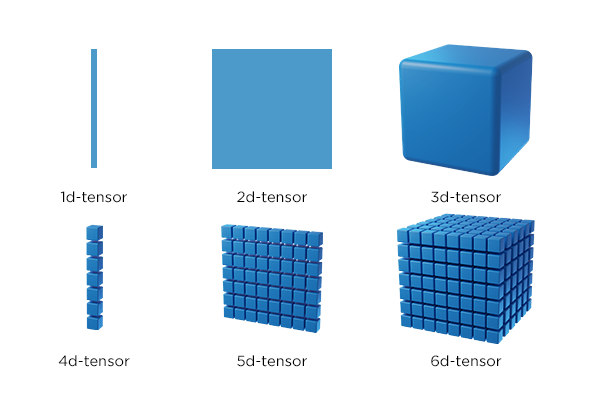

### **Installing PyTorch**

In [2]:
#--- check CUDA Driver

!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# choose between "CPU" or "GPU"

install_type = "CPU"
cuda_version = "cu124" # see above

In [8]:
#--- you can install the most recent release of PyTorch

#--- for CPU installation

if install_type=="CPU":

  %pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

#--- for GPU installation (the URL below hosts PyTorch wheels compiled with CUDA 12.4.)

elif install_type=="GPU":

  %pip install torch==2.6.0+cu124 torchvision torchaudio \
    --index-url https://download.pytorch.org/whl/cu124



Looking in indexes: https://download.pytorch.org/whl/cpu
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled torch-2.5.1+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu124
    Uninstalling torchvision-0.20.1+cu124:
      Successfully uninstalled torchvision-0.20.1+cu124
  Attempting uninstall: torchaudio
    Found existing i

In [4]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiohappyeyeballs                   2.4.6
aiohttp                            3.11.12
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            7.0.1
astropy-iers-data                  0.2025.2.10.0.33.26
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread          

In [ ]:
%pip install cuda-python==12.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.4/25.4 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: cuda-python
    Found existing installation: cuda-python 12.6.0
    Uninstalling cuda-python-12.6.0:
      Successfully uninstalled cuda-python-12.6.0


In [ ]:
#%pip show cuda-python

In [5]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3) # sets the precision of the printed numbers to three decimal places


PyTorch version: 2.6.0+cpu


In [6]:
import sys
print(sys.version)


3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [7]:
# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(torch.version.cuda)
    print(torch.cuda.device_count())

else:
    print("GPU not available, using CPU.")


GPU not available, using CPU.


### **Creating tensors in Pytorch**

In [ ]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [ ]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [ ]:
print(type(t_a))
print(t_a.dtype)

<class 'torch.Tensor'>
torch.int64


In [ ]:
print(type(t_b))
print(t_b.dtype)

<class 'torch.Tensor'>
torch.int32


In [ ]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [ ]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
t_zeros = torch.zeros(2, 3)

print(t_zeros.shape)
print(t_zeros)

torch.Size([2, 3])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.1406, 0.9446, 0.4206],
        [0.0613, 0.3332, 0.6908]])


### **Manipulating the data type and shape of tensors**

In [ ]:
print(t_b.dtype)

t_b_new = t_b.to(torch.int64)

print(t_b_new.dtype)

torch.int32
torch.int64


In [ ]:
import gc #garbage collector
import torch

def get_all_tensors():
    # Iterate through all objects tracked by the garbage collector
    tensors = [obj for obj in gc.get_objects() if isinstance(obj, torch.Tensor)]
    return tensors

# Print all tensors
for t in get_all_tensors():
    print(t)

tensor([4, 5, 6])
tensor([4, 5, 6])
tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.1406, 0.9446, 0.4206],
        [0.0613, 0.3332, 0.6908]])


<ipython-input-25-eb422b9ed847>:6: FutureWarning: `torch.distributed.reduce_op` is deprecated, please use `torch.distributed.ReduceOp` instead
  tensors = [obj for obj in gc.get_objects() if isinstance(obj, torch.Tensor)]


In [ ]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 1, 0) #dim0, #dim1 (t,0,1) or (t,1,0) return the same
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [ ]:
t

tensor([[0.8835, 0.1709, 0.3207, 0.4077, 0.8177],
        [0.0383, 0.1107, 0.7277, 0.1610, 0.7233],
        [0.6170, 0.0494, 0.4231, 0.8764, 0.3719]])

In [ ]:
t_tr

tensor([[0.4224, 0.0221, 0.8720],
        [0.3779, 0.1804, 0.3054],
        [0.4365, 0.0268, 0.6949],
        [0.8605, 0.2145, 0.0506],
        [0.2159, 0.6308, 0.8648]])

In [ ]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


In [ ]:
t = torch.zeros(1, 2, 1, 4, 1)

# The torch.squeeze() function removes dimensions of size 1.
# By specifying 2 as the dimension, you’re telling PyTorch to remove only dimension 2 if it is of size 1.
# where dim0, dim1, dim2, etc...
t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

print(t,"\n\n")

print(t_sqz)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])
tensor([[[[[0.],
           [0.],
           [0.],
           [0.]]],


         [[[0.],
           [0.],
           [0.],
           [0.]]]]]) 


tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]])


### **Applying mathematical operations to tensors**

In [ ]:
torch.manual_seed(1) #sets the seed for PyTorch's random number generator

t1 = 2 * torch.rand(5, 2) - 1.
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [ ]:
print(f"t1={t1}\n\n")
print(t2)

t1=tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])


tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [ ]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [ ]:
t4 = torch.mean(t3, axis=0)
print(t4)

tensor([ 0.3491, -0.0436])


In [ ]:
t4_b = torch.mean(t3, axis=1)
print(t4_b, t4_b.shape)

tensor([ 0.0656, -0.2655,  0.5699,  0.4338, -0.0402]) torch.Size([5])


*Note: These operations are implemented in PyTorch’s own backend (specifically the ATen library) in C/C++ to provide efficient and optimized tensor operations. This native implementation ensures that operations like torch.mean run fast on both CPU and GPU, and they are independent of NumPy's functions.*

In [ ]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [ ]:
t5.shape

torch.Size([5, 5])

In [ ]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [ ]:
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [ ]:
# calculates the norm (ord=2 means Euclidean norm, along dim)
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)


tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [ ]:
torch.sqrt(t1[0][0]**2+t1[0][1]**2)

tensor(0.6785)

In [ ]:
torch.sqrt(t1[0][0]**2+t1[0][1]**2).item()

0.6784621477127075

In [ ]:
# to verify the above calculated the norm, we can do
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))


array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### **Split, stack, and concatenate tensors**

In [ ]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3) #divides in 3 chunks

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [ ]:
# what happens if you divide by 4?
# Number of chunks with ceil(6/4)=2; remaining chunk will be floor(6/4)=1. Therefore a total of 3 chunks again.

t_splits = torch.chunk(t, 4) #divides in 3 chunks

[item.numpy() for item in t_splits]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]



---


* *See the above. Remember we did **np.set_printoptions(precision=3)** to set the precision of the printed numbers to three decimal places with numpy*

* *Notice that the function **torch.set_printoptions(precision=4)** is used by default by PyTorch*

* *Also notice that the numbers appear rounded for clarity and brevity during printing, but the actual computations and stored values maintain their full precision.*

---


In [ ]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [ ]:
A = torch.ones(2,2)
B = torch.zeros(3,2)

C = torch.cat([A, B], axis=0)
print(C)
print(C.shape)

tensor([[1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
torch.Size([5, 2])


In [ ]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=0)
print(S)
print(S.shape)

tensor([[1., 1., 1.],
        [0., 0., 0.]])
torch.Size([2, 3])


In [ ]:
A = A.reshape(1,3)
B = B.reshape(1,3)
C = torch.cat([A, B], axis=0)
print(C)
print(C.shape)

tensor([[1., 1., 1.],
        [0., 0., 0.]])
torch.Size([2, 3])




---

**EXERCISE**


1. **Create a Tensor:**  
   Create a tensor `A` of shape `[3, 4]` filled with random values.

2. **Transpose:**  
   Compute the transpose of `A` and store it in `B`.

3. **Matrix Multiplication:**  
   Multiply `A` by its transpose `B` using matrix multiplication. This will result in a new tensor `C`.

4. **Compute Means:**  
   Compute the mean of `C` along:
   - Dimension 0 (i.e., compute the mean of each column)
   - Dimension 1 (i.e., compute the mean of each row)

5. **Split:**  
   Split the tensor `C` into 2 equal chunks along dimension 0.  
   _Hint:_ If the number of rows is not evenly divisible, use `torch.chunk` which will distribute the rows as evenly as possible.

6. **Print:**  
   Print the following:
   - Tensor `A` and its shape.
   - Tensor `B` and its shape.
   - Tensor `C` and its shape.
   - The means computed in step 4.
   - The two chunks obtained in step 5.



---



### **Building input pipelines in PyTorch**

**Creating a PyTorch DataLoader from existing tensors**

In [ ]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
print(t.shape)
data_loader = DataLoader(t)

torch.Size([6])


In [ ]:
for item in data_loader:
    print(item, item.shape)

tensor([0.]) torch.Size([1])
tensor([1.]) torch.Size([1])
tensor([2.]) torch.Size([1])
tensor([3.]) torch.Size([1])
tensor([4.]) torch.Size([1])
tensor([5.]) torch.Size([1])


In [ ]:
data_loader = DataLoader(t, batch_size=3, drop_last=False) # The final batch will be included even if it has fewer than batch_size elements.

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


**Combining two tensors into a joint dataset**

In [1]:
from torch.utils.data import Dataset

class JointDataset(Dataset):

    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    # "magic" methods: e.g., automatically involked when using indexing operator

In [ ]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
#joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y) # Returns a tuple containing the i-th sample from each tensor (in this case, a feature tensor and the corresponding label)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


**Shuffle, batch, and repeat**

In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

print("\n\n-------------\n\n")

for epoch in range(2):
    print(f'***epoch #{epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


-------------


***epoch #1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
***epoch #2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


**Creating a dataset from files on your local storage disk or from a repository**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


#import pathlib

#imgdir_path = pathlib.Path('/content/drive/My Drive/W&M/Teaching/DATA621/cat_dog_images')

#file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import OxfordIIITPet
from torch.utils.data import DataLoader

# Define any preprocessing transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [ ]:
# Download (if not already downloaded) and load the dataset.
# Setting download=True will automatically download the dataset to the specified root.
dataset = OxfordIIITPet(root='./data', download=True, transform=transform)

# Create a DataLoader for iterating through the dataset
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Print out some details
print(f"Total samples: {len(dataset)}")

100%|██████████| 792M/792M [00:38<00:00, 20.4MB/s]
100%|██████████| 19.2M/19.2M [00:01<00:00, 10.8MB/s]


Total samples: 3680


In [ ]:
list_images, list_labels = map(list, zip(*dataset))

In [ ]:
# there are 37-class labels (pet breeds)
np.unique(list_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [ ]:
first6_images = []
first6_labels = []
for images, labels in data_loader:
    # images is typically a batch of images, so iterate over them
    for img, idx in zip(images, labels):
        first6_images.append(img)
        first6_labels.append(idx)
        if len(first6_images) == 6:
            break
    if len(first6_images) == 6:
        break

# Now, first6_images is a list of 6 image tensors.
#print(first6_images)

Image shape: (224, 224, 3)
tensor(7)
Image shape: (224, 224, 3)
tensor(34)
Image shape: (224, 224, 3)
tensor(0)
Image shape: (224, 224, 3)
tensor(35)
Image shape: (224, 224, 3)
tensor(1)
Image shape: (224, 224, 3)
tensor(35)


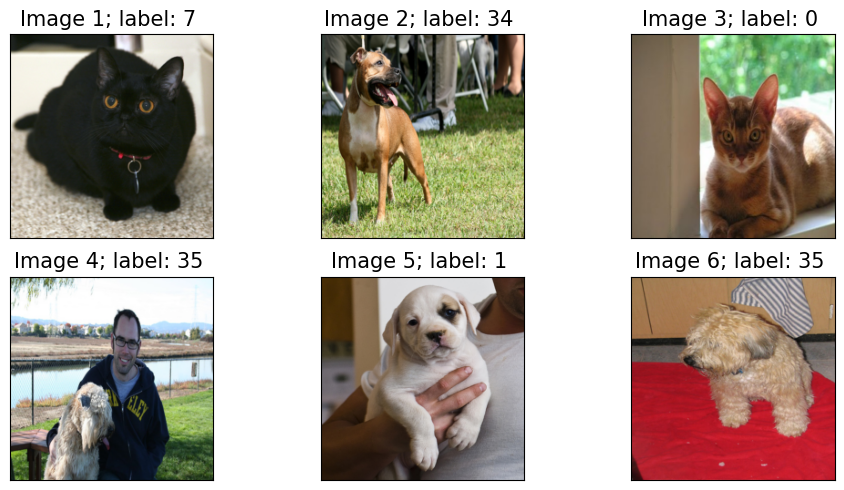

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
for i, img_tensor in enumerate(first6_images):
    # Convert the tensor to a NumPy array and change from (C, H, W) to (H, W, C)
    npimg = img_tensor.permute(1, 2, 0).cpu().numpy()
    print('Image shape:', npimg.shape)

    print(first6_labels[i])


    img_tensor.shape

    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(npimg)
    ax.set_title(f"Image {i+1}; label: {first6_labels[i]} ", size=15)

plt.tight_layout()
plt.show()

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(first6_images, first6_labels)
for file, label in image_dataset:
    print(file, label)

tensor([[[0.1176, 0.1137, 0.1176,  ..., 0.9098, 0.9020, 0.8941],
         [0.1176, 0.1176, 0.1216,  ..., 0.9176, 0.9137, 0.9020],
         [0.1137, 0.1216, 0.1216,  ..., 0.9255, 0.9176, 0.9059],
         ...,
         [0.7843, 0.7686, 0.8353,  ..., 0.7529, 0.8039, 0.8314],
         [0.6863, 0.6706, 0.7529,  ..., 0.7059, 0.7373, 0.7961],
         [0.6784, 0.7373, 0.8431,  ..., 0.7137, 0.5608, 0.6196]],

        [[0.1333, 0.1294, 0.1373,  ..., 0.8824, 0.8706, 0.8588],
         [0.1373, 0.1333, 0.1373,  ..., 0.8941, 0.8863, 0.8706],
         [0.1333, 0.1333, 0.1294,  ..., 0.9059, 0.8902, 0.8824],
         ...,
         [0.7529, 0.7490, 0.8196,  ..., 0.6980, 0.7529, 0.7765],
         [0.6314, 0.6157, 0.7098,  ..., 0.6627, 0.7059, 0.7686],
         [0.6118, 0.6745, 0.7961,  ..., 0.7020, 0.5412, 0.5922]],

        [[0.1176, 0.1294, 0.1137,  ..., 0.8196, 0.8039, 0.7961],
         [0.1216, 0.1216, 0.1098,  ..., 0.8235, 0.8118, 0.8000],
         [0.1255, 0.1255, 0.1176,  ..., 0.8353, 0.8314, 0.

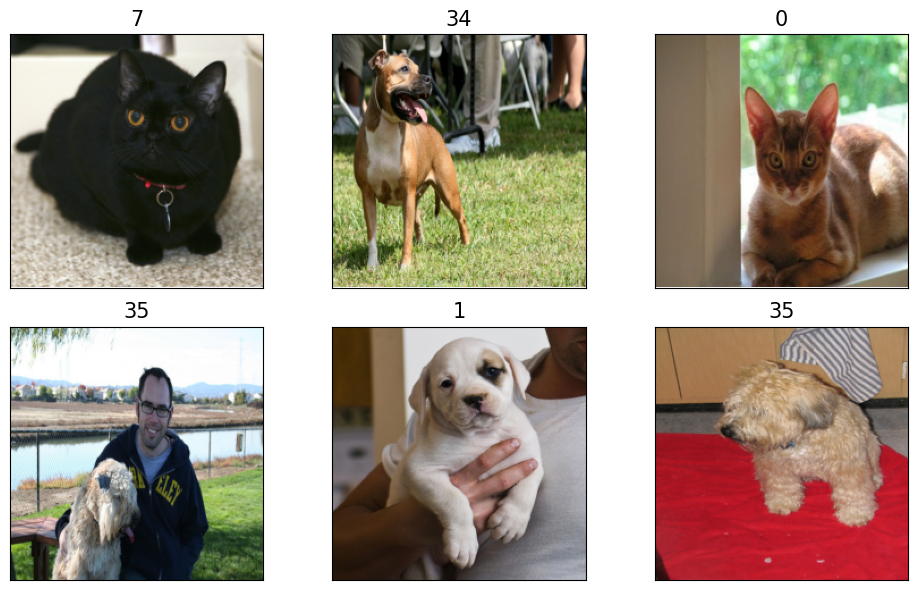

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])

    #imshow expect a numpy as argument
    #The original shape (C, H, W) is transformed to (H, W, C)
    # imshow expectes the channel dimension to be the last axis.

    ax.imshow(example[0].numpy().transpose((1, 2,0)))

    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()